In [7]:
import pandas as pd
from pandas_datareader import data, wb
import matplotlib 
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import hvplot.pandas
%matplotlib inline
import backtrader as bt
import alpaca_backtrader_api
import backtrader as bt
from datetime import datetime

In [8]:
import backtrader.plot

---
# Functions

***Creating a function using backtraders cerebro to easily test strategies***

In [24]:
def strategy_test(strategy,ticker,cash_amount=10000, stake_size=0):
    cerebro = bt.Cerebro()
    cerebro.addstrategy(strategy)
    cerebro.broker.set_cash(cash_amount)
    cerebro.addsizer(bt.sizers.FixedSize, stake=stake_size)
    cerebro.broker.setcommission(commission=0.001)

    data0 = bt.feeds.YahooFinanceData(dataname=ticker, fromdate=datetime(2017, 1, 1),
                                  todate=datetime(2020, 12, 4))
    cerebro.adddata(data0)
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.run()
    print('Ending Portfolio Value: %.2f' % cerebro.broker.getvalue())

    plt.rcParams["figure.figsize"] = [16,10]
    cerebro.plot(iplot=False) 

---
## Strategies

***Simple strategies to run with backtader***

In [9]:
class SmaCross(bt.SignalStrategy):
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=9), bt.ind.SMA(period=20)
        crossover = bt.ind.CrossOver(sma1, sma2)
        self.signal_add(bt.SIGNAL_LONG, crossover)
class EmaCross(bt.SignalStrategy):
    def __init__(self):
        ema1, ema2, ema3 = bt.ind.EMA(period=9), bt.ind.EMA(period=21), bt.ind.EMA(period=55)
        crossover = bt.ind.CrossOver(ema1, ema2, ema3)
        self.signal_add(bt.SIGNAL_LONG, crossover)

---
# Testing strategies

Starting Portfolio Value: 100000.00
Ending Portfolio Value: 142769.36


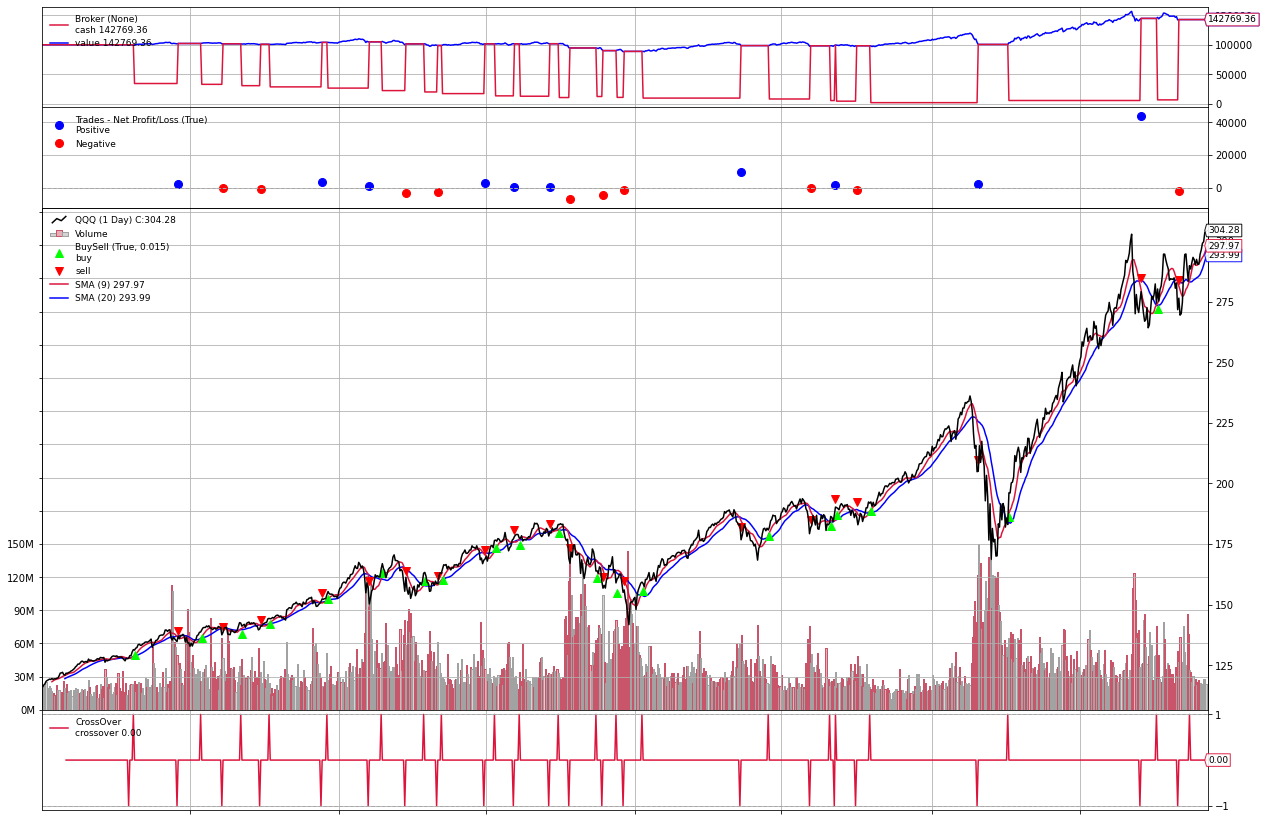

In [10]:
strategy_test(SmaCross,"QQQ",cash_amount=100000,stake_size=500)

## **<u>Testing the QQQ with the Small moving cross over**
---

Starting Portfolio Value: 100000.00
Ending Portfolio Value: 137173.51


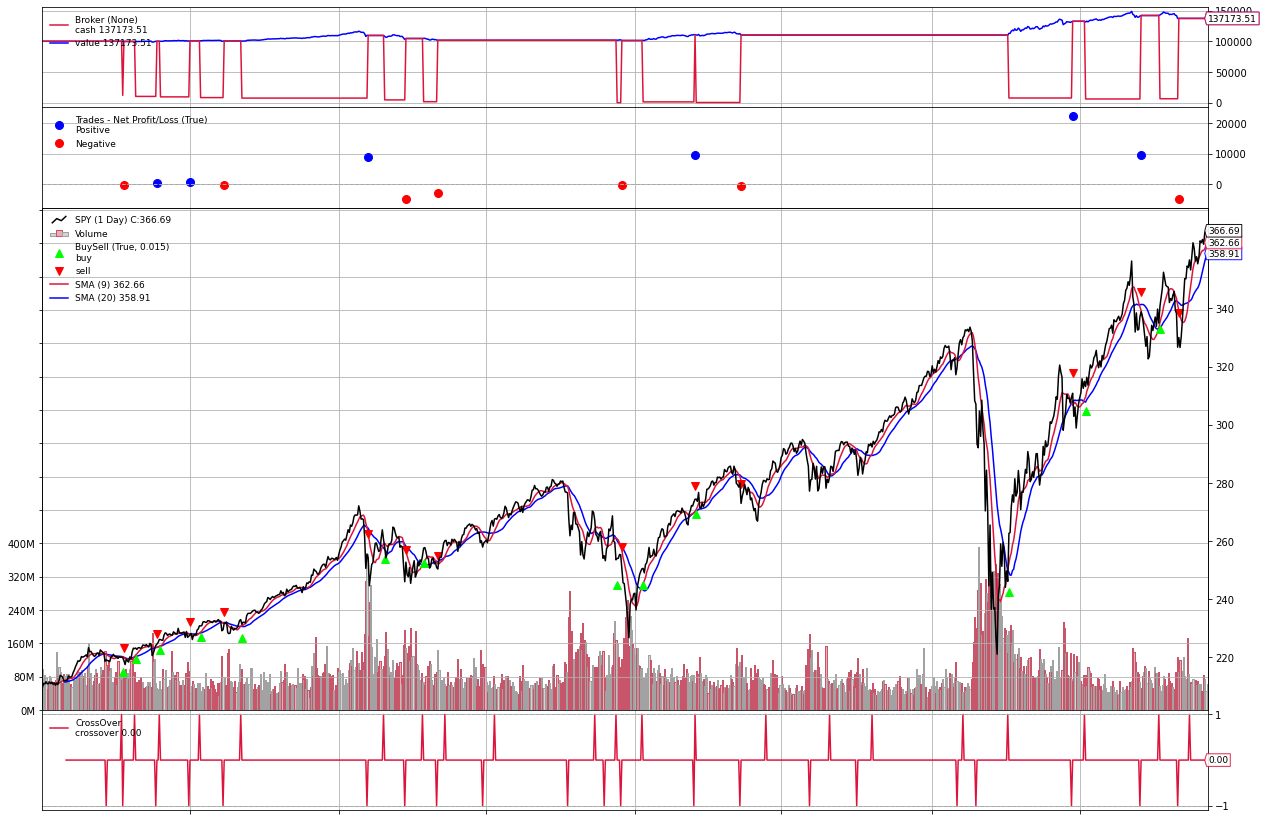

In [11]:
strategy_test(SmaCross,"SPY",cash_amount=100000,stake_size=400)

## **<u>Testing the SPY with the Small moving cross over**
---

Starting Portfolio Value: 100000.00
Ending Portfolio Value: 134694.72


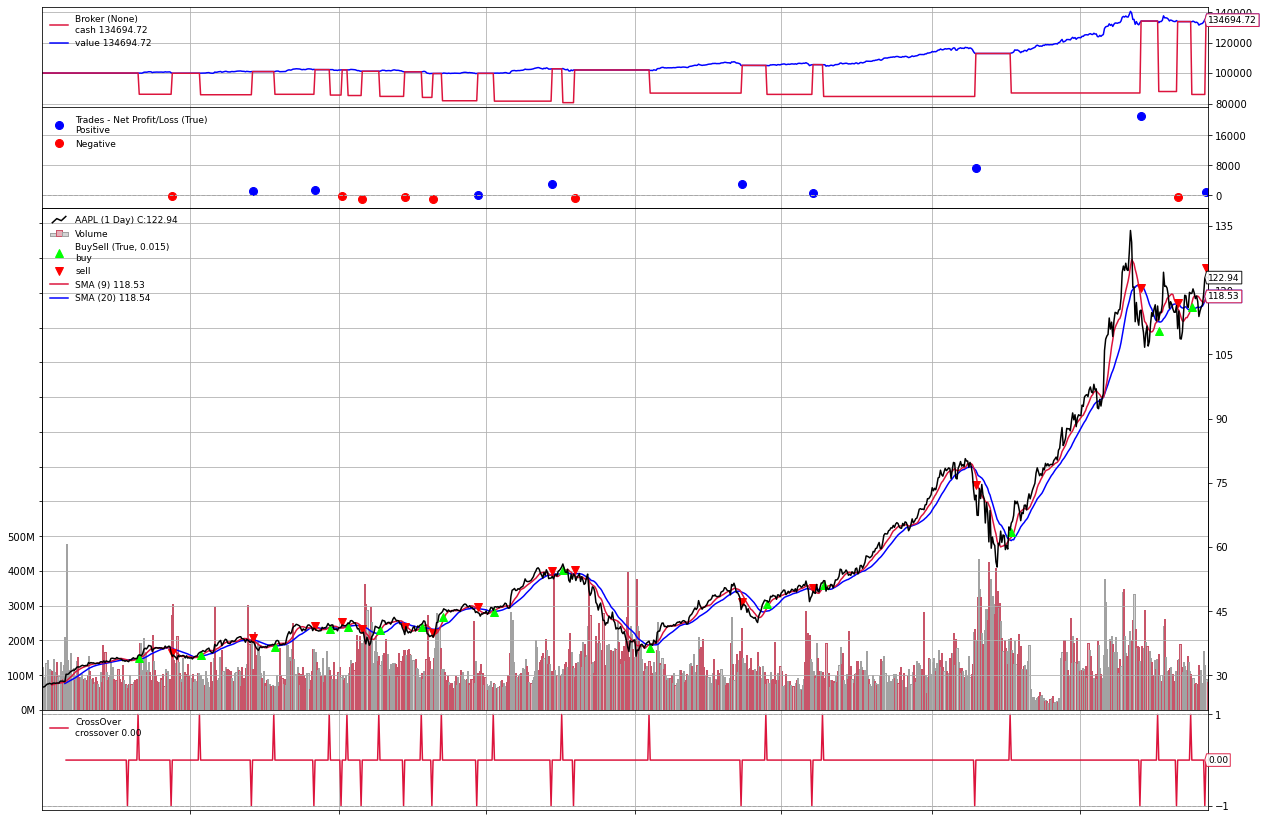

In [12]:
strategy_test(SmaCross,"AAPL",cash_amount=100000,stake_size=400)

## **<u>Testing the AAPL with the Small moving cross over**
---

Starting Portfolio Value: 100000.00
Ending Portfolio Value: 135047.49


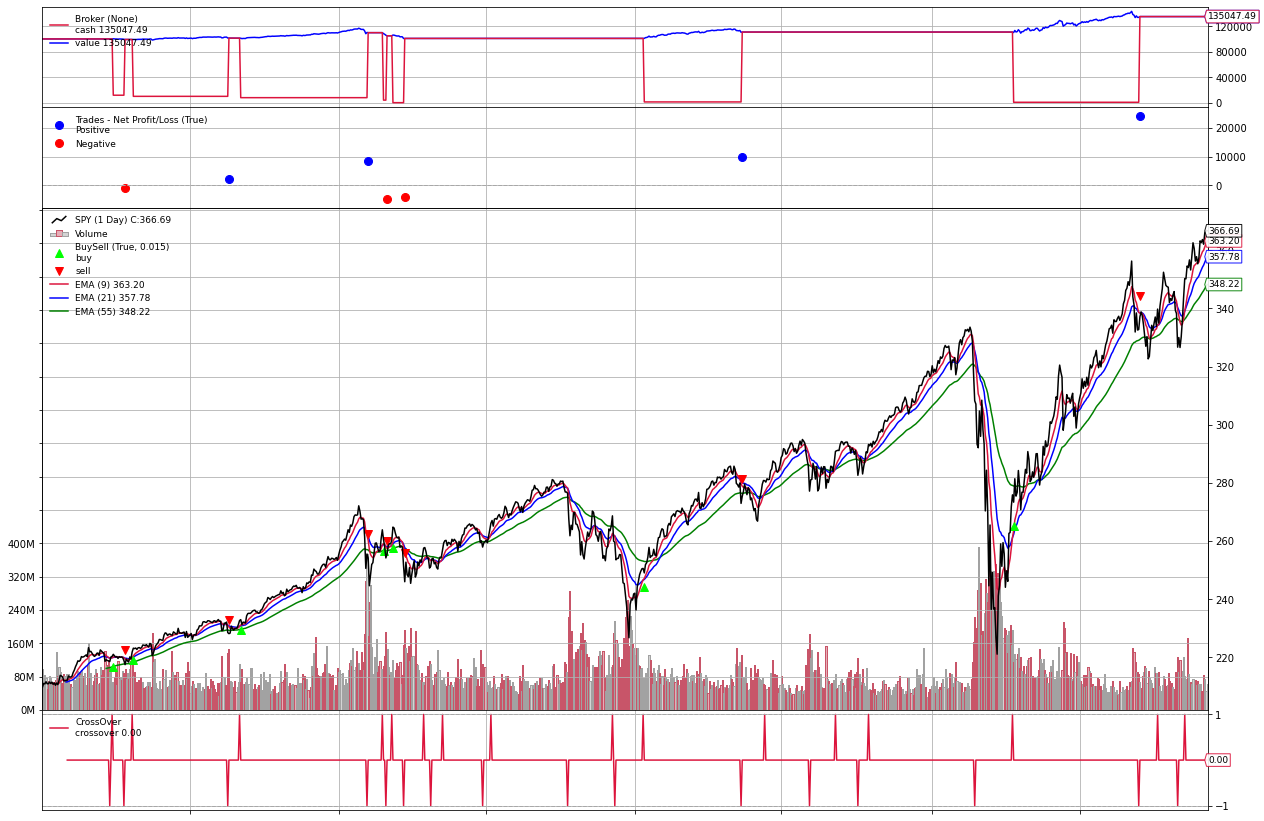

In [13]:
strategy_test(EmaCross,"SPY",cash_amount=100000,stake_size=400)

## **<u>Testing the SPY with the EmaCrossover**
---

Starting Portfolio Value: 100000.00
Ending Portfolio Value: 160374.22


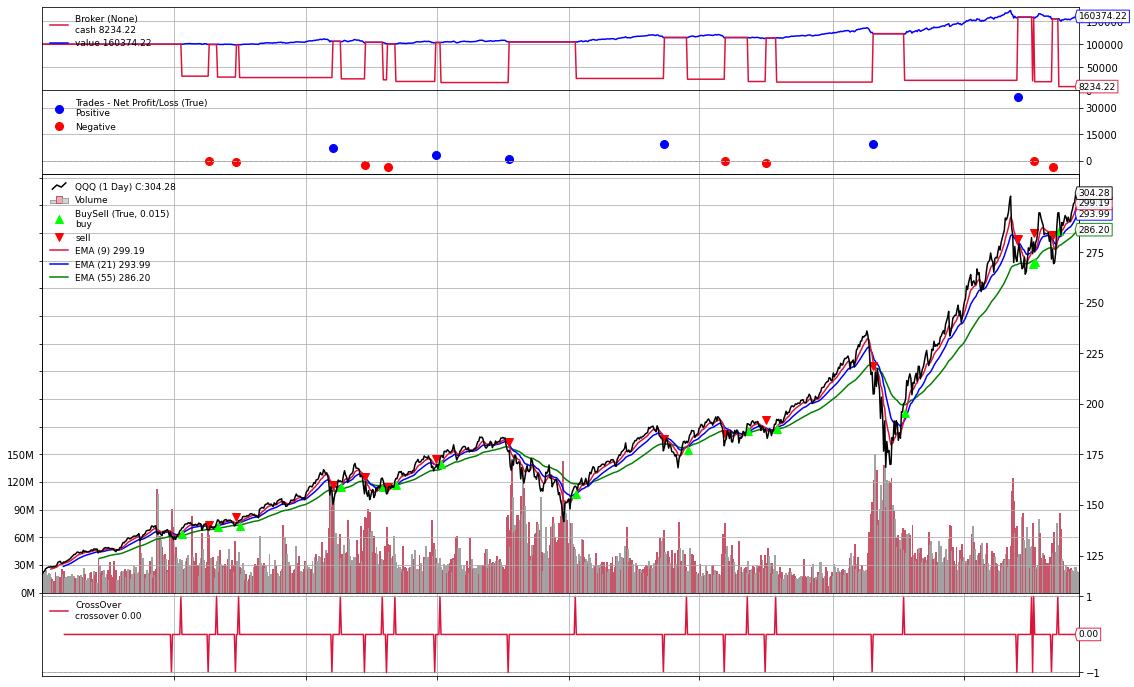

In [25]:
strategy_test(EmaCross,"QQQ",cash_amount=100000,stake_size=500)

## **<u>Testing the QQQ with the EmaCrossover**
---

Starting Portfolio Value: 100000.00
Ending Portfolio Value: 144545.91


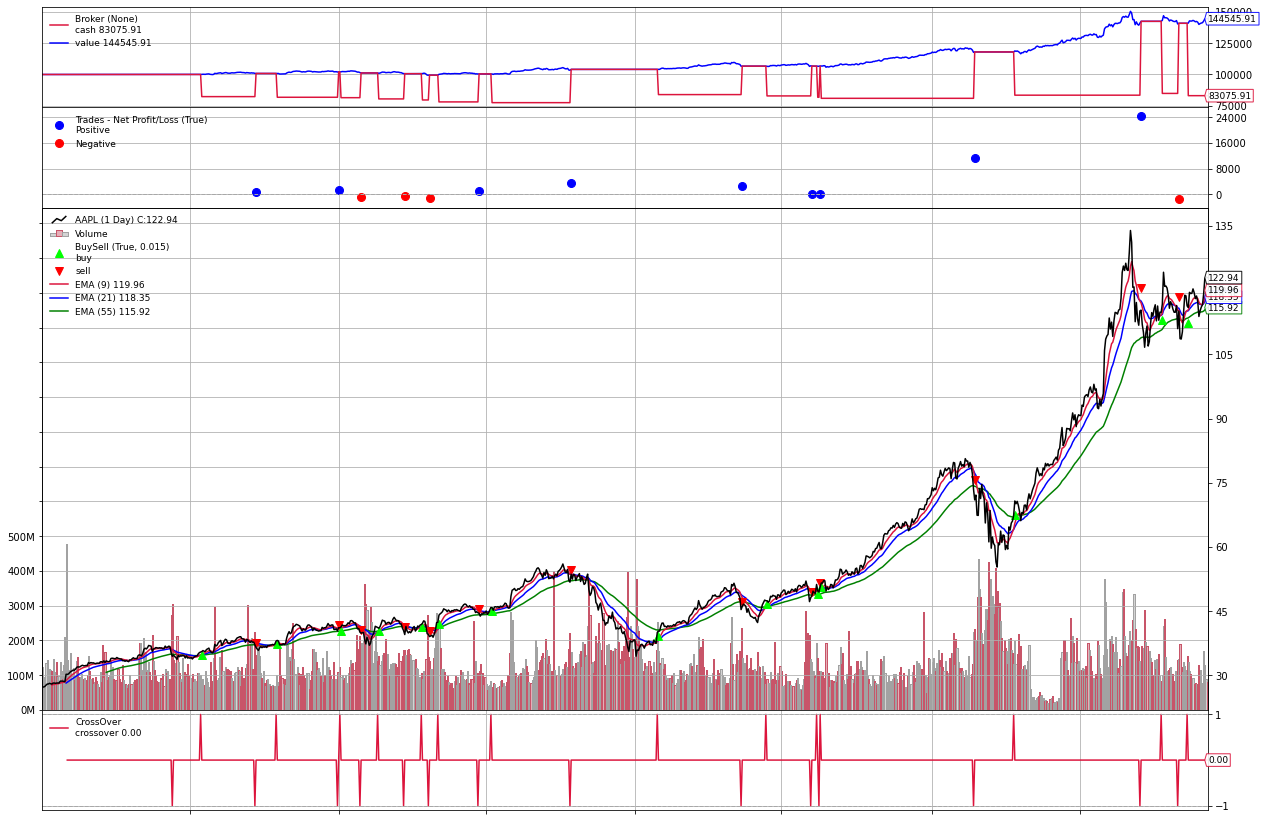

In [15]:
strategy_test(EmaCross,"AAPL",cash_amount=100000,stake_size=500)

## **<u>Testing the AAPl with the EmaCrossover**
---

In [ ]:
class EmaCross(bt.SignalStrategy):
    def __init__(self):
        ema1, ema2, ema3 = bt.ind.EMA(period=9), bt.ind.EMA(period=21), bt.ind.EMA(period=55)
        crossover = bt.ind.CrossOver(ema1, ema2, ema3)
        self.signal_add(bt.SIGNAL_LONG, crossover)

In [27]:
class MACD(bt.SignalStrategy):
    def __init__(self):
        fast = 12, 
        slow = 26,
        fastMA = ema(close, fast),
        slowMA = ema(close, slow)
        macd = fastMA - slowMA
        signal = sma(macd, 9)
        return signal

In [28]:
strategy_test(MACD,"AAPL",cash_amount=100000,stake_size=500)

Starting Portfolio Value: 100000.00


NameError: name 'ema' is not defined